In [1]:
import pandas as pd
import seaborn as sns
cols = ['Plant','Asset','Start Time','Event Type','Energy Loss  (kWh)']
df = pd.read_csv('sm3.csv',usecols=cols,dtype={"Energy Loss  (kWh)": 'Float64'})
df.set_index(['Plant','Asset'])

Event Type  \
Plant                                              Asset                                                                   
047 - San Diego Inspiration Point                  INV04 - INV - 4                                     Inverter Degraded   
006 - City of San Diego- Point Loma Library        INV01 - INV-1                                       Inverter Degraded   
009 - Kings Highway                                009 - Kings Highway                                   Plant Comm Loss   
042 - Stockton East Water District -  Low Side ... INV10 - INVERTER 10                                 Inverter Degraded   
                                                   INV07 - INVERTER 7                                  Inverter Degraded   
                                                   INV01 - INVERTER 1                                  Inverter Degraded   
                                                   INV08 - INVERTER 8                                  Inverter Degraded   
                                                   042 - Stockton East Water District -  Low Side ...     Plant Degraded   
                                                   INV06 - INVERTER 6                                  Inverter Degraded   
                                                   INV02 - INVERTER 2                                  Inverter Degraded   
                                                   INV15 - INVERTER 15                                 Inverter Degraded   
                                                   INV03 - INVERTER 3                                  Inverter Degraded   
                                                   INV05 - INVERTER 5                                  Inverter Degraded   
                                                   INV09 - INVERTER 9                                  Inverter Degraded   
041 - Stockton East Water District -  High Side... INV13 - INVERTER 13                                 Inverter Degraded   
                                                   INV01 - INVERTER 1                                  Inverter Degraded   
                                                   INV03 - INVERTER 3                                  Inverter Degraded   
042 - Stockton East Water District -  Low Side ... INV04 - INVERTER 4                                  Inverter Degraded   
041 - Stockton East Water District -  High Side... 041 - Stockton East Water District -  High Side...     Plant Degraded   
                                                   INV07 - INVERTER 7                                  Inverter Degraded   
                                                   INV06 - INVERTER 6                                  Inverter Degraded   
                                                   INV10 - INVERTER 10                                 Inverter Degraded   
                                                   INV11 - INVERTER 11                                 Inverter Degraded   
                                                   INV02 - INVERTER 2                                  Inverter Degraded   
                                                   INV09 - INVERTER 9                                  Inverter Degraded   
                                                   INV12 - INVERTER 12                                 Inverter Degraded   
                                                   INV15 - INVERTER 15                                 Inverter Degraded   
                                                   INV05 - INVERTER 5                                  Inverter Degraded   
                                                   INV14 - INVERTER 14                                 Inverter Degraded   
                                                   INV04 - INVERTER 4                                  Inverter Degraded   
...                                                                                                                  ...   
034 - Pima - Wheel

In [4]:
df['Plant'].head()

0                    047 - San Diego Inspiration Point
1          006 - City of San Diego- Point Loma Library
2                                  009 - Kings Highway
3    042 - Stockton East Water District -  Low Side...
4    042 - Stockton East Water District -  Low Side...
Name: Plant, dtype: object

In [5]:
df['Energy Loss  (kWh)'].max()

15836.642130000002

In [6]:
grouped = df['Energy Loss  (kWh)'].groupby(df['Event Type'])

In [7]:
grouped

In [8]:
grouped.mean()

Event Type
Comm Loss                   NaN
Down (Plant Down)     31.369920
Inv Down             198.532545
Inverter Degraded     13.189495
Plant Comm Loss             NaN
Plant Degraded              NaN
Plant Down           215.917362
Name: Energy Loss  (kWh), dtype: float64

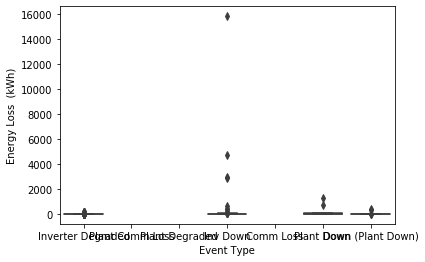

In [11]:
sns.boxplot( x=df['Event Type'],y=df["Energy Loss  (kWh)"] )